In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"/content/mushroom.csv", index_col = 0)

In [3]:
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [4]:
data = data.reset_index(drop=True)

In [5]:
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [6]:
data.duplicated().sum()

np.int64(1024)

In [7]:
data.drop_duplicates(keep = 'first', inplace = True)

In [8]:
data.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


In [9]:
data.reset_index(drop = 'first', inplace = True)

<Axes: >

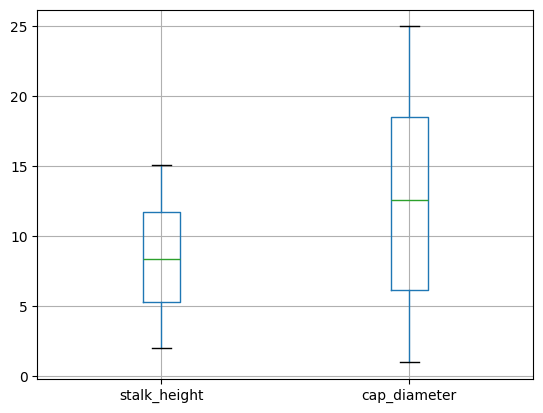

In [10]:
data.boxplot()

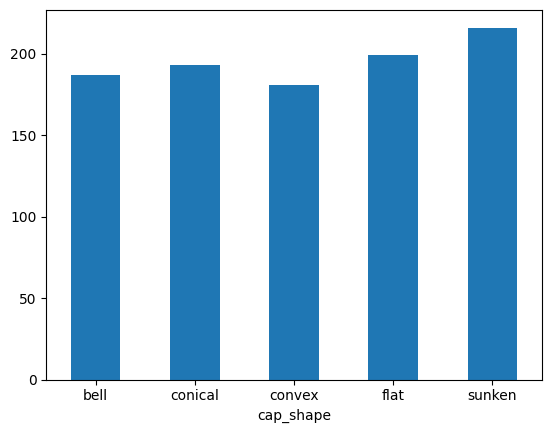

In [11]:
data['cap_shape'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

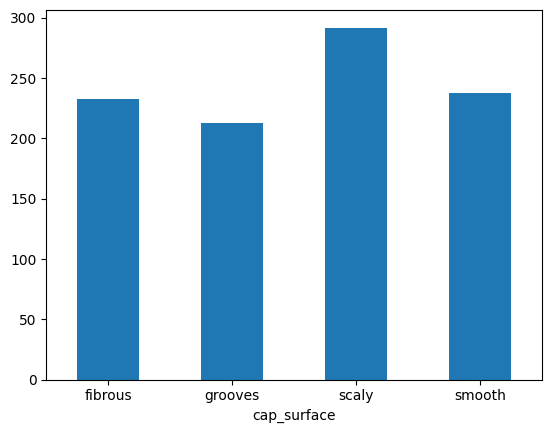

In [12]:
data['cap_surface'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

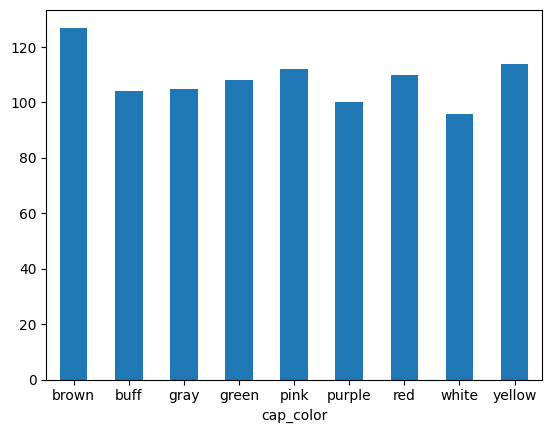

In [13]:
data['cap_color'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

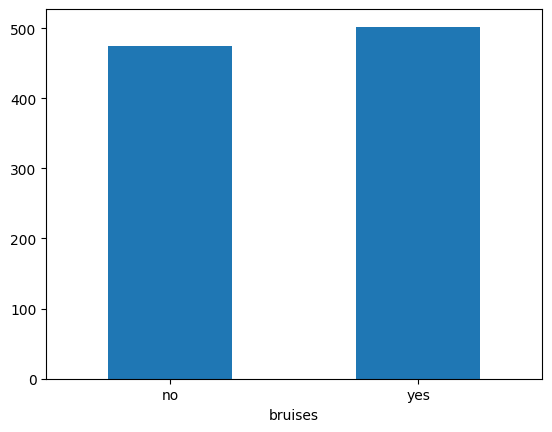

In [14]:
data['bruises'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

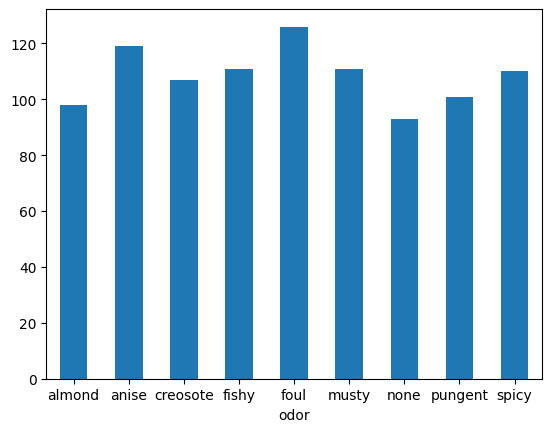

In [15]:
data['odor'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

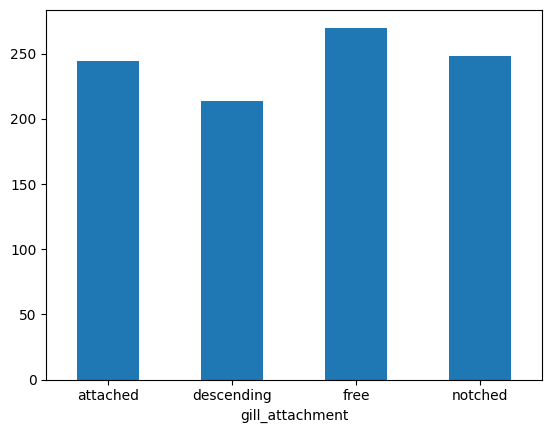

In [16]:
data['gill_attachment'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

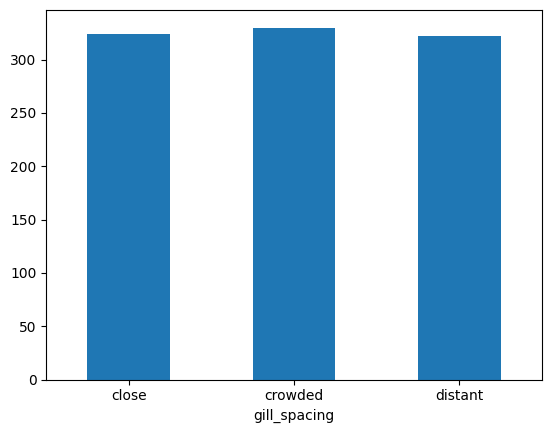

In [17]:
data['gill_spacing'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

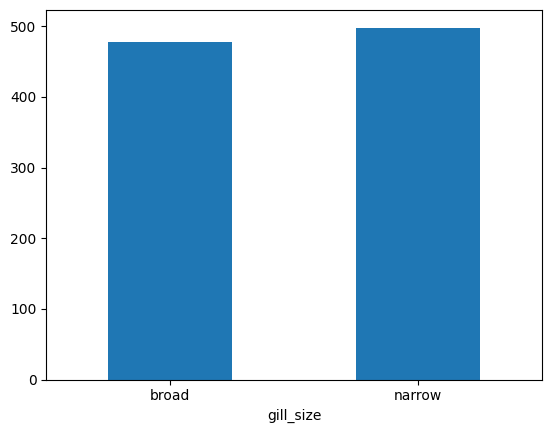

In [18]:
data['gill_size'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

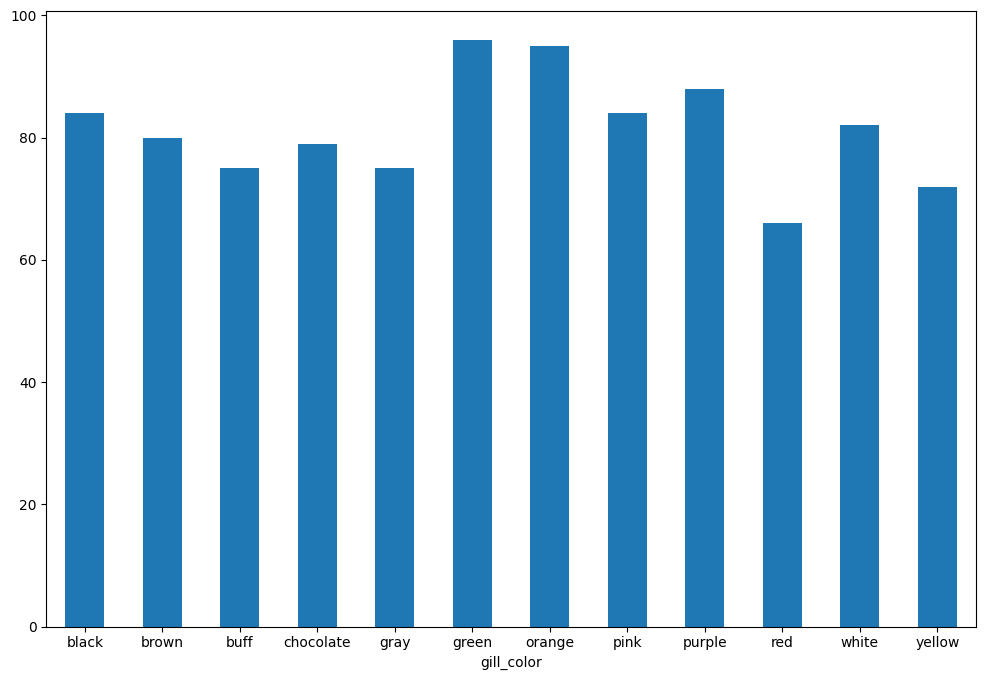

In [19]:
plt.figure(figsize = (12,8))
data['gill_color'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

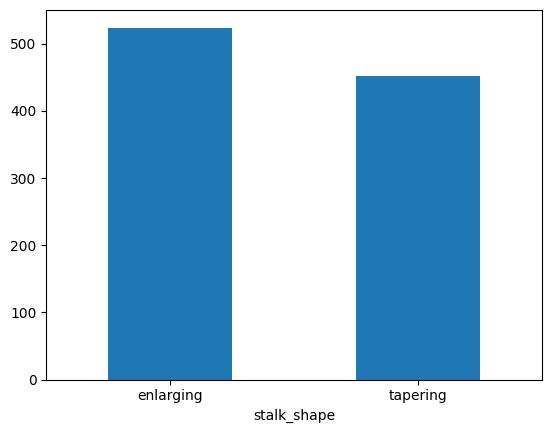

In [20]:
data['stalk_shape'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

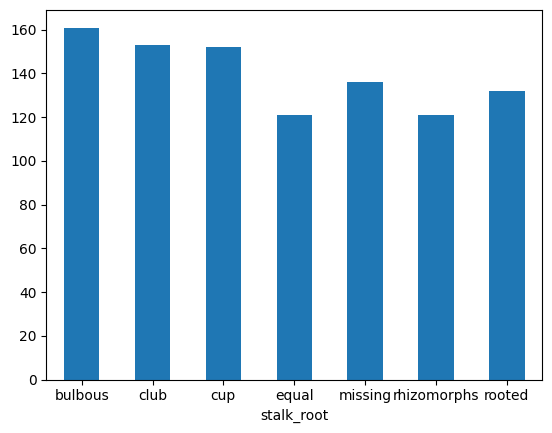

In [21]:
data['stalk_root'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

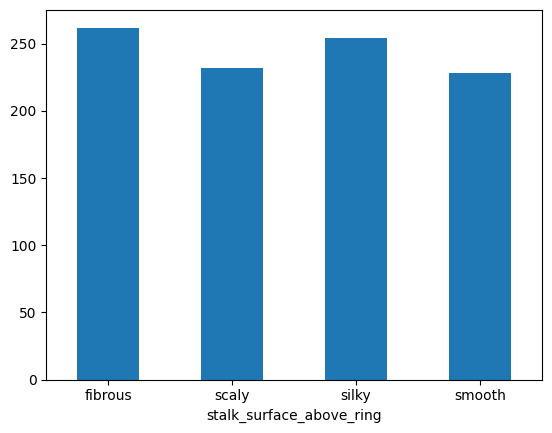

In [22]:
data['stalk_surface_above_ring'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

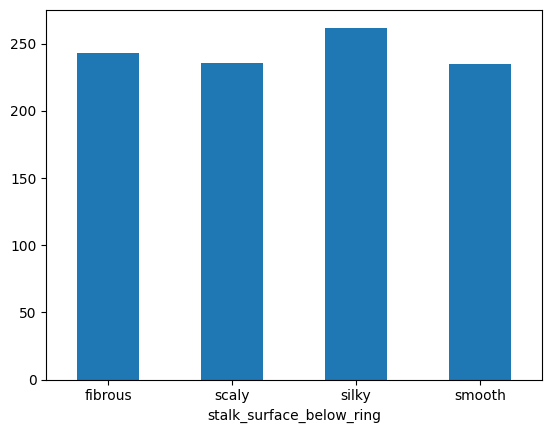

In [23]:
data['stalk_surface_below_ring'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

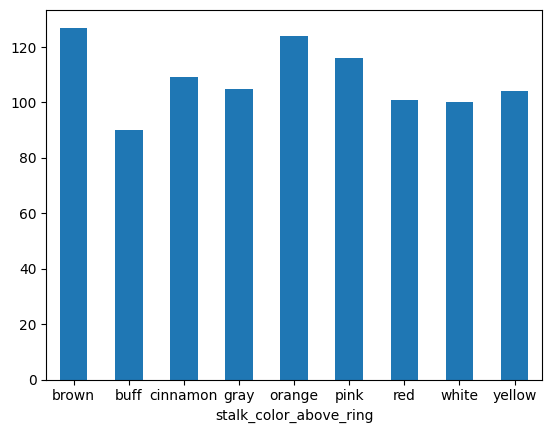

In [24]:
data['stalk_color_above_ring'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

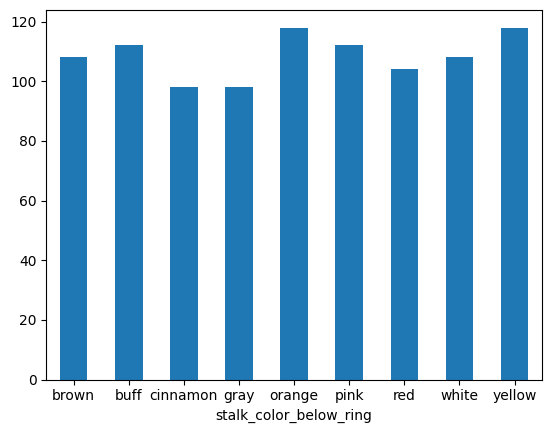

In [25]:
data['stalk_color_below_ring'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

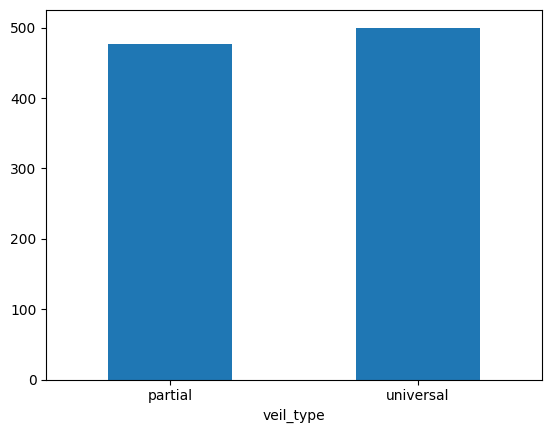

In [26]:
data['veil_type'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

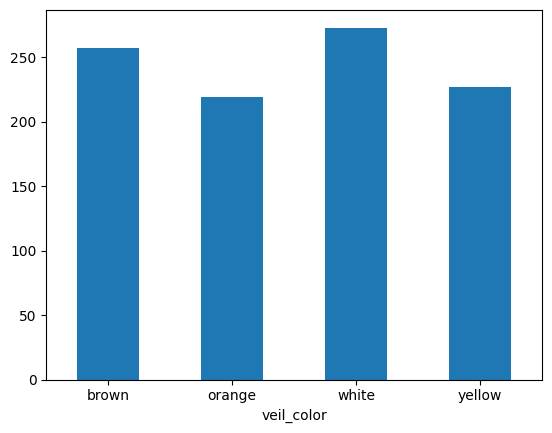

In [27]:
data['veil_color'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

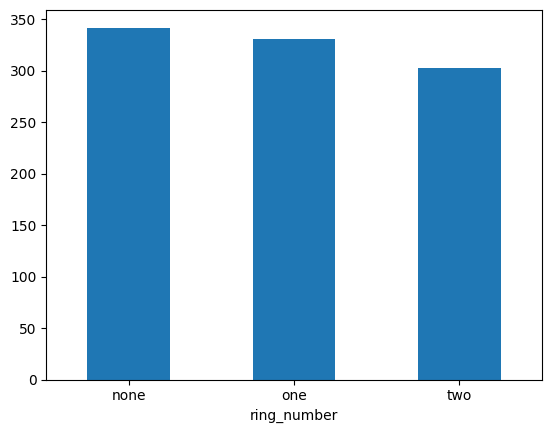

In [28]:
data['ring_number'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

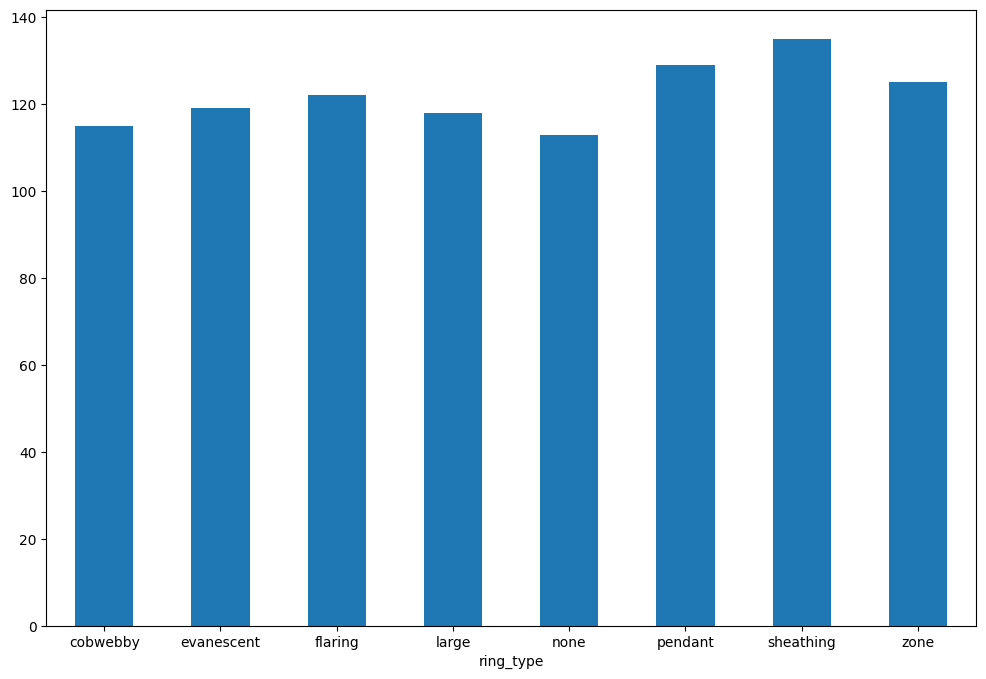

In [29]:
plt.figure(figsize = (12,8))
data['ring_type'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

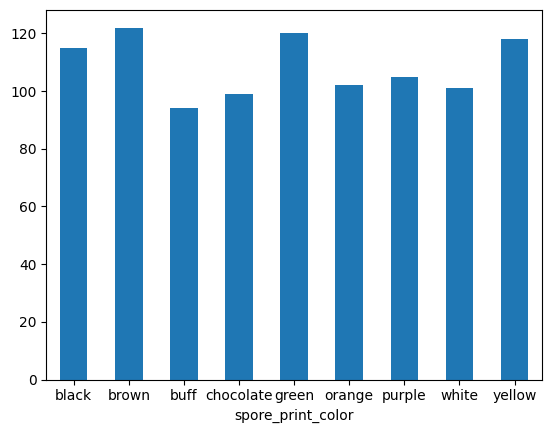

In [30]:
data['spore_print_color'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

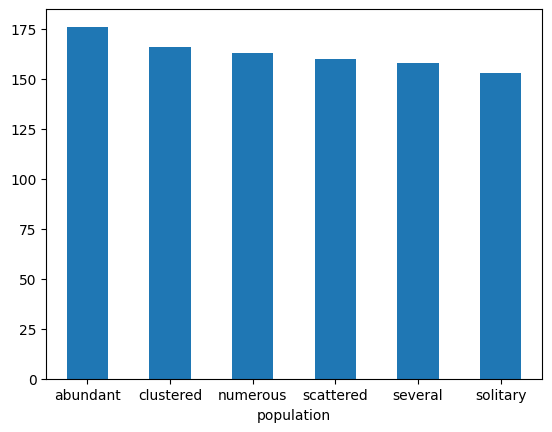

In [31]:
data['population'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

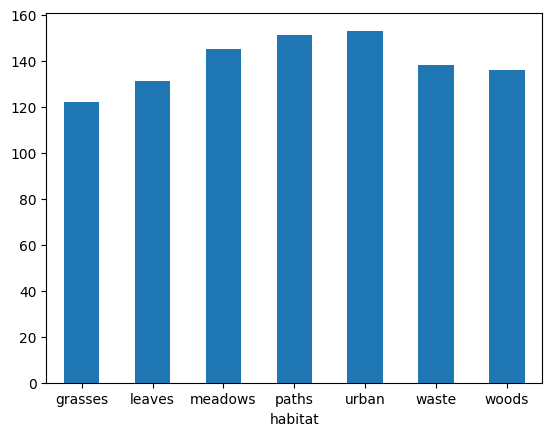

In [32]:
data['habitat'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

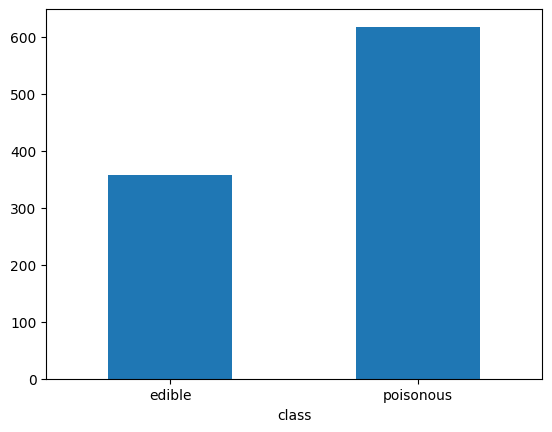

In [33]:
data['class'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

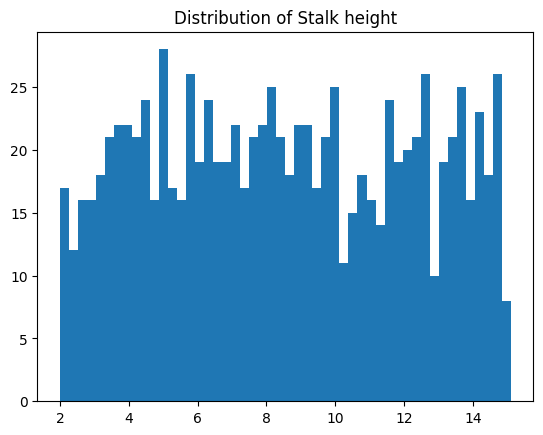

In [34]:
plt.hist(data['stalk_height'], bins = 50)
plt.title('Distribution of Stalk height');

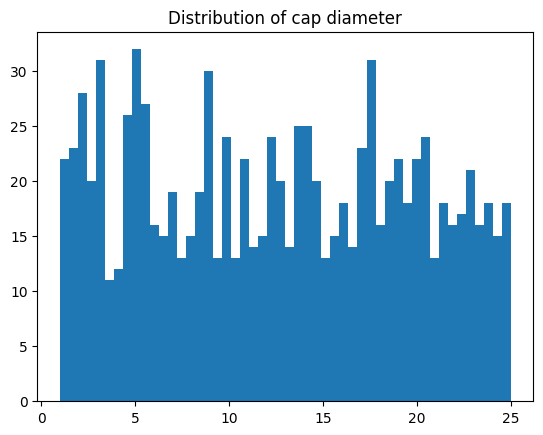

In [35]:
plt.hist(data['cap_diameter'], bins = 50)
plt.title('Distribution of cap diameter');

In [36]:
import ppscore as pps
pps_matrix = pps.matrix(data)[['x', 'y', 'ppscore']]

# Pivot it into a heatmap-friendly format
pps_heatmap = pps_matrix.pivot(index='x', columns='y', values='ppscore')

ModuleNotFoundError: No module named 'ppscore'

In [ ]:
pps_heatmap.head()

y,bruises,cap_color,cap_diameter,cap_shape,cap_surface,class,gill_attachment,gill_color,gill_size,gill_spacing,...,spore_print_color,stalk_color_above_ring,stalk_color_below_ring,stalk_height,stalk_root,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,veil_color,veil_type
x,,,,,,,,,,,,,,,,,,,,,
bruises,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.001476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cap_color,0.0,1.000000,0.001966,0.000000,0.0,0.0,0.000000,0.000000,0.055922,0.0,...,0.010197,0.0,0.0,0.000000,0.000000,0.000000,0.055568,0.000000,0.016516,0.000000
cap_diameter,0.0,0.025808,1.000000,0.035645,0.0,0.0,0.028625,0.018089,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.046176,0.023045,0.026349,0.009373,0.000000,0.009156
cap_shape,0.0,0.000000,0.000192,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cap_surface,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Plot the heatmap
plt.figure(figsize=(26,10))
sns.heatmap(pps_heatmap, annot=True, cmap='viridis', fmt = '.4f')
plt.title('PPS Matrix (Predictive Power Score Heatmap)');

### Encoding

In [ ]:
data.dtypes

cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [ ]:
encode_col = data.drop(['stalk_height', 'cap_diameter', 'class'], axis=1).columns
encoded_data = pd.get_dummies(data[encode_col], drop_first=True).astype(int)
data = data.drop(encode_col, axis=1).join(encoded_data)

In [ ]:
data

,class,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,poisonous,14.276173,5.054983,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,edible,3.952715,19.068319,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,poisonous,9.054265,7.205884,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,poisonous,5.226499,20.932692,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,poisonous,14.037532,12.545245,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,edible,13.020616,9.993008,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
972,poisonous,3.751597,18.868135,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
973,edible,13.134058,15.740028,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
974,poisonous,6.500840,13.501957,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
sc = StandardScaler()
data[['stalk_height', 'cap_diameter']] = sc.fit_transform(data[['stalk_height', 'cap_diameter']])

In [ ]:
data

,class,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,poisonous,1.553976,-1.080201,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,edible,-1.235285,0.926435,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,poisonous,0.143086,-0.772204,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,poisonous,-0.891126,1.193403,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,poisonous,1.489498,-0.007635,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,edible,1.214741,-0.373102,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
972,poisonous,-1.289624,0.897769,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
973,edible,1.245391,0.449841,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
974,poisonous,-0.546816,0.129361,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
data['class'].value_counts()

poisonous    618
edible       358
Name: class, dtype: int64

In [ ]:
x = data.drop('class', axis = 1)
y = data[['class']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)

In [ ]:
svm = SVC(kernel='linear', C = 0.2)

In [ ]:
def train_model(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    print(f'Training Acccuracy: {model.score(x_train, y_train)}')
    print(f'Training Acccuracy: {model.score(x_test, y_test)}\n')
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    return model

In [ ]:
model = train_model(x_train , y_train, x_test, y_test, svm)

Training Acccuracy: 0.6448717948717949
Training Acccuracy: 0.6275510204081632

              precision    recall  f1-score   support

      edible       0.43      0.04      0.08        72
   poisonous       0.63      0.97      0.77       124

    accuracy                           0.63       196
   macro avg       0.53      0.50      0.42       196
weighted avg       0.56      0.63      0.51       196



In [ ]:
svm1 = SVC(kernel='rbf', C = 0.1)

In [ ]:
model1 = train_model(x_train , y_train, x_test, y_test, svm1)

Training Acccuracy: 0.6333333333333333
Training Acccuracy: 0.6326530612244898

              precision    recall  f1-score   support

      edible       0.00      0.00      0.00        72
   poisonous       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



In [ ]:
svm2 = SVC(kernel='poly', C = 0.1)

In [ ]:
model2 = train_model(x_train , y_train, x_test, y_test, svm2)

Training Acccuracy: 0.6333333333333333
Training Acccuracy: 0.6326530612244898

              precision    recall  f1-score   support

      edible       0.00      0.00      0.00        72
   poisonous       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



In [ ]:
params = {
    'kernel' : ['poly', 'rbf', 'linear'],
    'C' : [0.1, 0.6, 1]
}

In [ ]:
grid = GridSearchCV(SVC(), params, scoring='accuracy')
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 0.6, 'kernel': 'poly'}
Best Score: 0.641025641025641
